In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import os
import datetime as dt
import re

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# import csv
wiki_feat = pd.read_csv('../WebScraper/wikiarticles.csv')
wiki_feat = wiki_feat.set_index('article_name') #set article name as index
wiki_feat['date_article_creation'] = wiki_feat['date_article_creation'].str[7:] #strip time

# clean up column 'date_article_creation' and make 'days_since_creation'
wiki_feat['date_article_creation']= pd.to_datetime(wiki_feat['date_article_creation'], errors='coerce')
today = pd.to_datetime(dt.date.today())
wiki_feat['days_since_creation'] = (today - wiki_feat['date_article_creation']) / pd.Timedelta(1, 'D') # convert timedelta object to pure day by dividing by 1 d

In [3]:
lang_nums = [] # target
ref_counts = [] # feat2
body_text_lens = [] # feat3
main_article_num = [] # feat4
see_also_num = [] # feat5
further_info_num = [] # feat6
table_text_lens = [] # feat7
sports = [] # feat8
exec_counter = 0

for article in wiki_feat.index:
    filename = "../wikiarticles/" + article + ".html"
    html_handle = open(filename)
    html_text = html_handle.read()
    soup = BeautifulSoup(html_text, 'lxml')

    # filling list for target
    lang_section = soup.find("nav", {"id":"p-lang"})
    lang_num = len(lang_section.find_all('li'))
    lang_nums.append(lang_num)

    # filling list for feature 2, extract number of references from html
    try:
        ref_count = len(soup.find('ol', class_='references').find_all('li'))
    except AttributeError: #when there are no references
        ref_count = 0
    ref_counts.append(ref_count)
    
    # use for finding features 3-6
    body_text = soup.find("div", {"id":"mw-content-text"}).text

    # filling list for feature 3, extract length of body text
    len_body_text = len(body_text)
    body_text_lens.append(len_body_text)

    # find all occurances of "Main article:" or "Main articles:" (feat 4)
    main_article_count = 0
    for main_article in re.finditer('Main article:', body_text):
        main_article_count += 1
    for main_articles in re.finditer('Main articles:', body_text):
        main_article_count += 1
    main_article_num.append(main_article_count)

    # find all occurances of "See also:" (feat 5)
    see_also_count = 0
    for see_also in re.finditer('See also:', body_text):
        see_also_count += 1
    see_also_num.append(see_also_count)

    # find all occurnaces of "Further information:" (feat 6)
    further_info_count = 0
    for further_info in re.finditer('Further info:', body_text):
        further_info_count += 1
    further_info_num.append(further_info_count)

    # find all text within any tables, and find length (feat 7)
    table_list = soup.find_all("table")
    table_text_len = 0
    for element in table_list:
        table_text_len += len(element.text)
    table_text_lens.append(table_text_len)

    # is this article sports? (feat 8)
    category_text = soup.find("div", {"id":"mw-normal-catlinks"}).text
    sport_list = ['Baseball', 'baseball', 'Basketball', 'basketball', 'Football', 'football', 'Soccer', 'soccer', 'Hockey', 'hockey', 'Volleyball', 'volleyball', 'Tennis', 'tennis', 'Cricket', 'cricket', 'Golf', 'golf']
    sports_bool = 0
    for sport in sport_list:
        if re.findall(sport, category_text) != []:
            sports_bool = 1
    sports.append(sports_bool)

    exec_counter += 1
    print(exec_counter)

wiki_feat['languages'] = lang_nums
wiki_feat['references'] = ref_counts
wiki_feat['text_length'] = body_text_lens
wiki_feat['main_article_num'] = main_article_num
wiki_feat['see_also_num'] = see_also_num
wiki_feat['further_info_num'] = further_info_num
wiki_feat['table_text_len'] = table_text_lens
wiki_feat['sports'] = sports

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [80]:
# wiki_feat.sort_values(by='languages', ascending=False).head(10)

# playground
filename = "../wikiarticles/Marcelo Peterson.html"
html_handle = open(filename)
html_text = html_handle.read()
soup = BeautifulSoup(html_text, 'lxml')


0


In [ ]:
wiki_feat.dropna(inplace=True)
wiki_feat.drop(columns = ['further_info_num'], inplace=True);


In [16]:
wiki_feat.sort_values(by='languages',ascending=False).head(10)

,date_article_creation,days_since_creation,languages,references,text_length,main_article_num,see_also_num,table_text_len,sports
article_name,,,,,,,,,
1858,2011-11-06,3256.0,166,9,20258,0,0,1816,0
Ice,2009-07-22,4093.0,133,78,57604,10,0,9117,0
Dysprosium,2004-02-01,6091.0,123,50,26859,1,1,8909,0
Eucalyptus,2012-05-08,3072.0,91,105,69373,3,0,1078,0
.uy,2008-01-06,4656.0,86,0,5497,0,1,11635,0
Lubusz Voivodeship,2006-01-06,5386.0,75,5,9980,0,0,3177,0
Jeans,2007-07-18,4828.0,73,1,30809,0,1,4433,0
Gamete,2006-11-19,5069.0,69,6,7629,0,0,1758,0
Temple in Jerusalem,2020-05-09,149.0,66,41,41676,6,1,12357,0


&lt;matplotlib.collections.PathCollection at 0x7f9c87b5b130&gt;

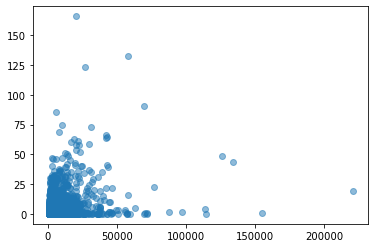

In [13]:


%matplotlib inline

plt.scatter(wiki_feat['text_length'],wiki_feat['languages'], alpha=0.5)

In [6]:
wiki_feat.corr()

,days_since_creation,languages,references,text_length,main_article_num,see_also_num,table_text_len,sports
days_since_creation,1.000000,0.014251,-0.010142,-0.005334,-0.038075,-0.015981,-0.000482,0.018083
languages,0.014251,1.000000,0.164232,0.259755,0.124989,0.085147,0.116386,-0.018440
references,-0.010142,0.164232,1.000000,0.605973,0.246525,0.172056,0.129058,0.028907
text_length,-0.005334,0.259755,0.605973,1.000000,0.374234,0.296936,0.520462,0.027078
main_article_num,-0.038075,0.124989,0.246525,0.374234,1.000000,0.142091,0.171290,0.041975
see_also_num,-0.015981,0.085147,0.172056,0.296936,0.142091,1.000000,0.134538,0.079197
table_text_len,-0.000482,0.116386,0.129058,0.520462,0.171290,0.134538,1.000000,0.042925
sports,0.018083,-0.018440,0.028907,0.027078,0.041975,0.079197,0.042925,1.000000


In [7]:
# Create an empty model
lr_full = LinearRegression()

# Features
X = wiki_feat.loc[:, ['days_since_creation','references','text_length', 'main_article_num', 'see_also_num','table_text_len', 'sports']]

# Target
y = wiki_feat['languages']

# Fit  
lr_full.fit(X, y)

# Score
lr_full.score(X, y)

0.06987598101827253

In [9]:
p = PolynomialFeatures()
X_poly = p.fit_transform(X)

lr_full = LinearRegression()
lr_full.fit(X_poly, y)
lr_full.score(X_poly, y)

0.12809900230727767

In [12]:
variables = p.get_feature_names(wiki_feat.columns)
coefficients = lr_full.coef_
table = list(zip(variables, coefficients))